# Algorytmy macierzowe - eliminacja Gaussa
## Wykonali: Robert Kazimirek, Paweł Kruczkiewicz


**Numer ćwiczenia: 1**

*Treść ćwiczenia*: 

Proszę napisać procedurę [S]=Schur_Complement(A,n,m)  gdzie A to macierz wejściowa, n to rozmiar tej macierzy A,  m to rozmiar podmacierzy (tzw. dopełnienia Schura),  powstałej poprzez wyeliminowanie n-m wierszy i kolumn  z macierzy A:


In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Badany algorytm
Będziemy badać procedurę Schur_Complement. W jej realizacji wykorzystamy klasyczną eliminację Gaussa (którą zatrzymamy po m - n krokach). 
Przekształcenie to jest wykorzystywane w algebrze liniowej, między innymi do rozwiązywania układów równań liniowych, ale także w statystyce i inżynierii.
Zbadamy czas wykonania procedury, w zależności od rodzaju i wielkości macierzy, jak również od rozmiaru dopełnienia. Obliczymy także koszt obliczeniowy i pamięciowy zaimplementowanego algorytmu.

In [2]:
def schur_compliment(A, m):
    n = A.shape[0]
    number_of_steps = min(n - m, n - 1)
    for k in range(number_of_steps):
        akk = A[k,k]
        for j in range(k+1, n):
            A[j, k:n] -= A[k, k:n]*(A[j,k]/akk)

### Funkcje pomocnicze
Dla wygody i klarowności przygotowaliśmy kilka funkcji, które pomogą w przeprowadzanym badaniu

**Wczytywanie pliku csv z macierzą**

In [3]:
def get_matrix_from_csv(csv_file):
    return np.loadtxt(open(csv_file, "rb"), delimiter=",", skiprows=0)

**Funkcja spy**

In [4]:
def spy(matrix, label, plot):
    mask = matrix == 0
    plot.matshow(mask)

**Funkcja "powielająca" macierz**, tj. dla podanego parametru `q` będacego liczbą naturalną oraz dla macierzy o wymiarach `n x n` zwraca macierz o wymiarach `(q*n) x (q*n)` będąca q-krotnym powtórzeniem wejściowym macierzy wzdłóż obu boków.

In [5]:
def scale_matrix(A, q):
    B = np.vstack([A]*q)
    C = np.hstack([B]*q)
    return C

**Pomiar czasu**

In [6]:
from time import time

def log_time(func):
    t1 = time()
    func()
    t2 = time()
    return t2 - t1

**Rysowanie wykresu**

In [188]:
def show_line_plot(x_vals, y_vals, title, x_label, y_label):
    x_vals = [element * 81 for element in x_vals]
    x_labels = [label for label in range(81, x_vals[-1] + 81, 81)]
    
    f = plt.figure()
    f.set_figwidth(16)
    f.set_figheight(9)
    
    plt.scatter(x_vals, y_vals, color='seagreen')
    for i in range(len(x_vals)):
        plt.annotate(str(y_vals[i]), (x_vals[i], y_vals[i]))
    
    plt.plot(x_vals, y_vals, color='royalblue')

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.xticks(x_labels, x_labels)

    plt.show()

**Funkcja mierząca czas procedury**

In [189]:
def get_schur_compliment_time(A, m):
    number_of_experiments = 5
    times = [log_time(lambda: schur_compliment(A.copy(), m))
         for _ in range(number_of_experiments)]
    return round(sum(times)/number_of_experiments, 5)

def get_schur_compliment_times(matrices, m_func):
    return [get_schur_compliment_time(matrix, m_func(matrix.shape[0])) for matrix in matrices]

def get_schur_compliment_times_wrapper(csv_file, m_func, qs):
    original_matrix = get_matrix_from_csv(csv_file)
    matrices = [scale_matrix(original_matrix, q) for q in qs]
    return get_schur_compliment_times(matrices, m_func)

**Przygotowanie wywołania funkcji**

In [190]:
qs = [1,2,3,4,5,10,20]   # możliwe, że to trzeba będzie zmienić, żeby czasy były dłuższe

m_half_fun = lambda n: n//2
m_quater_fun = lambda n: n//4
m_one_eight_fun = lambda n: n//8
m_one_sixteen_fun = lambda n: n//16
m_one_thirty_two_fun = lambda n: n//32
m_single_fun = lambda n: 1

get_schur_compliment_times_for_fem = lambda m_fun: get_schur_compliment_times_wrapper(csv_file, m_fun, qs)

## Ad. 1
Badamy algorytm na przykładzie macierzy IGA.

**Wybór macierzy**

Naszą macierzą jest macierz wygenerowana za pomocą procedury `massmatrix(0,7,2,0)`, którą następnie zapisaliśmy do pisaliśmy do pliku csv i wczytaliśmy poniżej. Ma ona rozmiar `81x81`.

Następnie w testach sprawdzamy czas wykonania badanej faktoryzacji na zwielokrotnionych przez funkcję `scale_matrix(A, q)` macierzach, gdzie kolejne wartości parametru `q` zostały ustalone arbitralnie.

In [191]:
csv_file = "csv/iga81_2.csv"

**Działanie dla parametru `m = n/2`**

<ipython-input-2-63335f6c832d>:7: RuntimeWarning: invalid value encountered in double_scalars
  A[j, k:n] -= A[k, k:n]*(A[j,k]/akk)


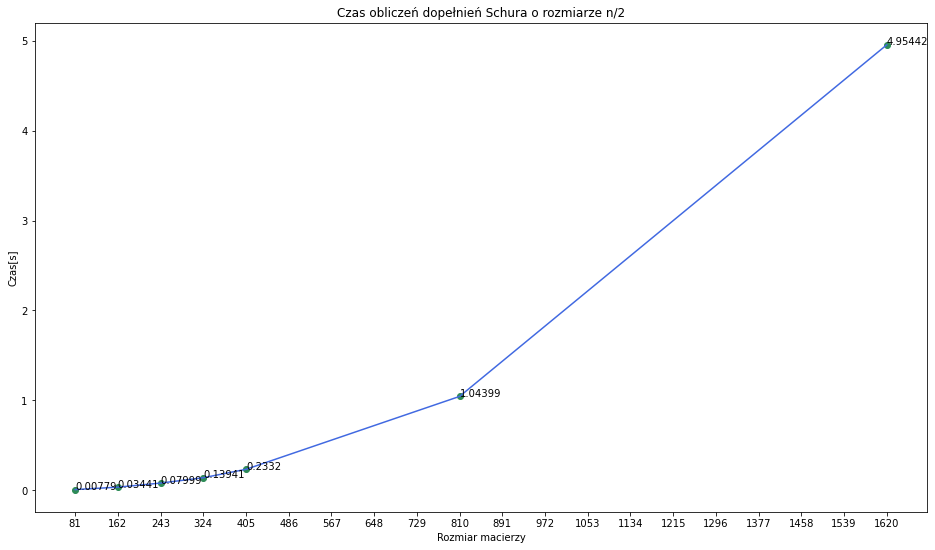

In [192]:
times = get_schur_compliment_times_for_fem(m_half_fun)
show_line_plot(qs, times, "Czas obliczeń dopełnień Schura o rozmiarze n/2", "Rozmiar macierzy", "Czas[s]")

**Działanie dla parametru `m = n/4`**

<ipython-input-2-63335f6c832d>:7: RuntimeWarning: invalid value encountered in double_scalars
  A[j, k:n] -= A[k, k:n]*(A[j,k]/akk)


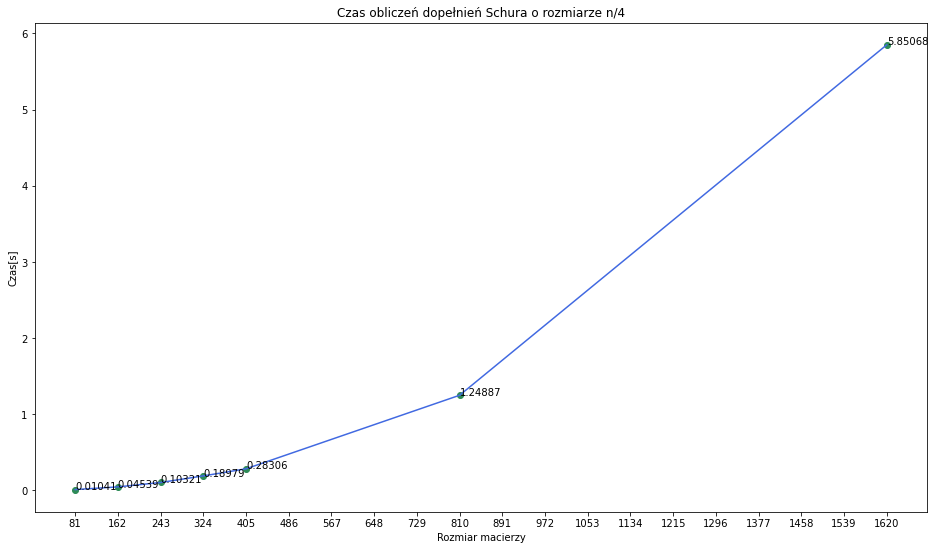

In [193]:
times = get_schur_compliment_times_for_fem(m_quater_fun)
show_line_plot(qs, times, "Czas obliczeń dopełnień Schura o rozmiarze n/4", "Rozmiar macierzy", "Czas[s]")

**Działanie dla parametru `m = n/8`**

<ipython-input-2-63335f6c832d>:7: RuntimeWarning: invalid value encountered in double_scalars
  A[j, k:n] -= A[k, k:n]*(A[j,k]/akk)


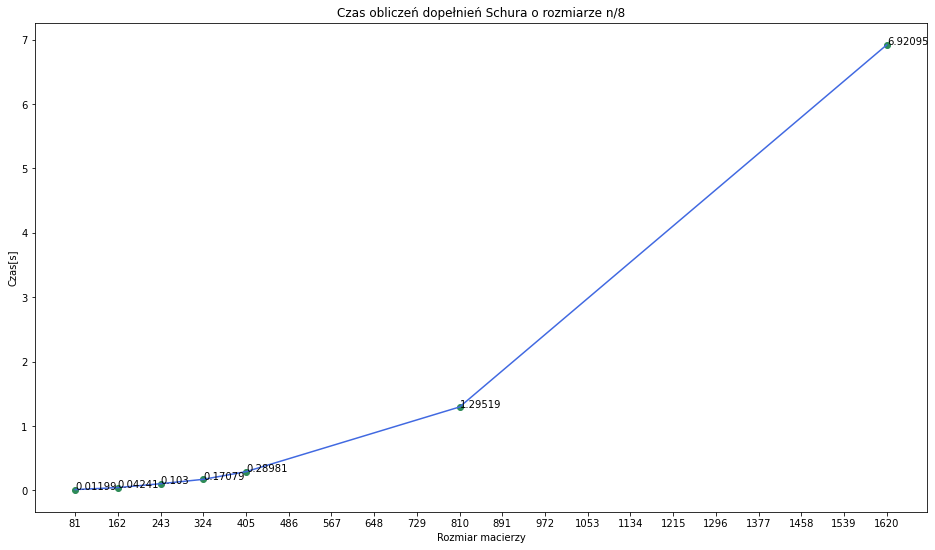

In [194]:
times = get_schur_compliment_times_for_fem(m_one_eight_fun)
show_line_plot(qs, times, "Czas obliczeń dopełnień Schura o rozmiarze n/8", "Rozmiar macierzy", "Czas[s]")

**Działanie dla parametru `m = n/16`**

<ipython-input-2-63335f6c832d>:7: RuntimeWarning: invalid value encountered in double_scalars
  A[j, k:n] -= A[k, k:n]*(A[j,k]/akk)


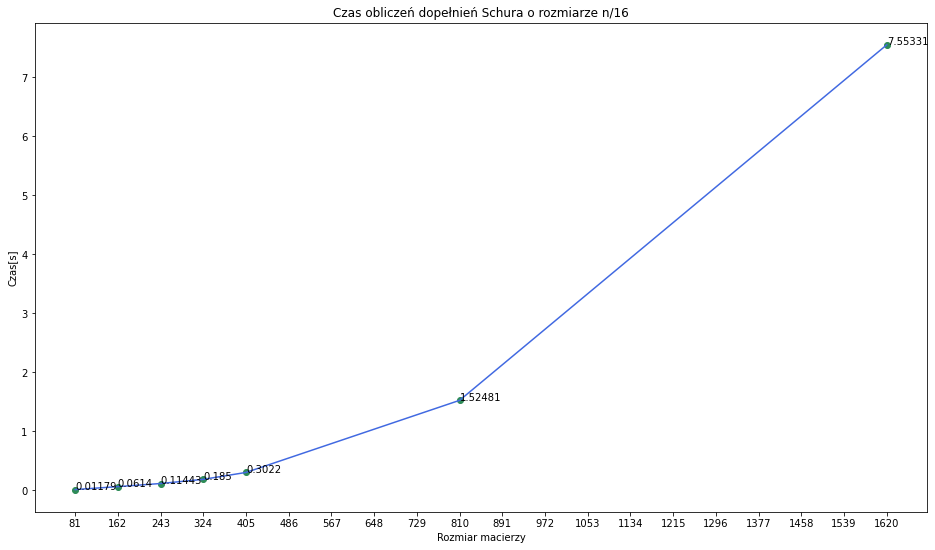

In [195]:
times = get_schur_compliment_times_for_fem(m_one_sixteen_fun)
show_line_plot(qs, times, "Czas obliczeń dopełnień Schura o rozmiarze n/16", "Rozmiar macierzy", "Czas[s]")

**Działanie dla parametru `m = n/32`**

<ipython-input-2-63335f6c832d>:7: RuntimeWarning: invalid value encountered in double_scalars
  A[j, k:n] -= A[k, k:n]*(A[j,k]/akk)


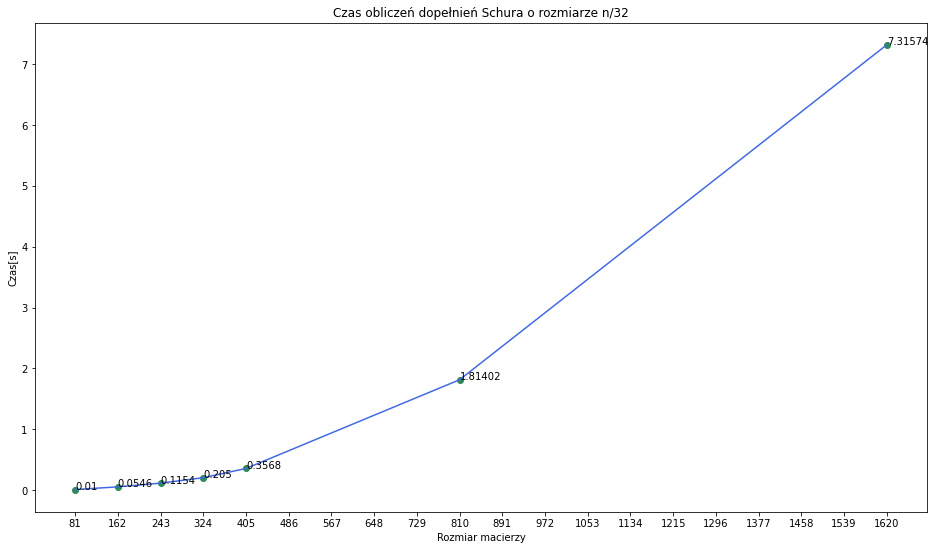

In [196]:
times = get_schur_compliment_times_for_fem(m_one_thirty_two_fun)
show_line_plot(qs, times, "Czas obliczeń dopełnień Schura o rozmiarze n/32", "Rozmiar macierzy", "Czas[s]")

**Działanie dla parametru `m = 1`**

<ipython-input-2-63335f6c832d>:7: RuntimeWarning: invalid value encountered in double_scalars
  A[j, k:n] -= A[k, k:n]*(A[j,k]/akk)


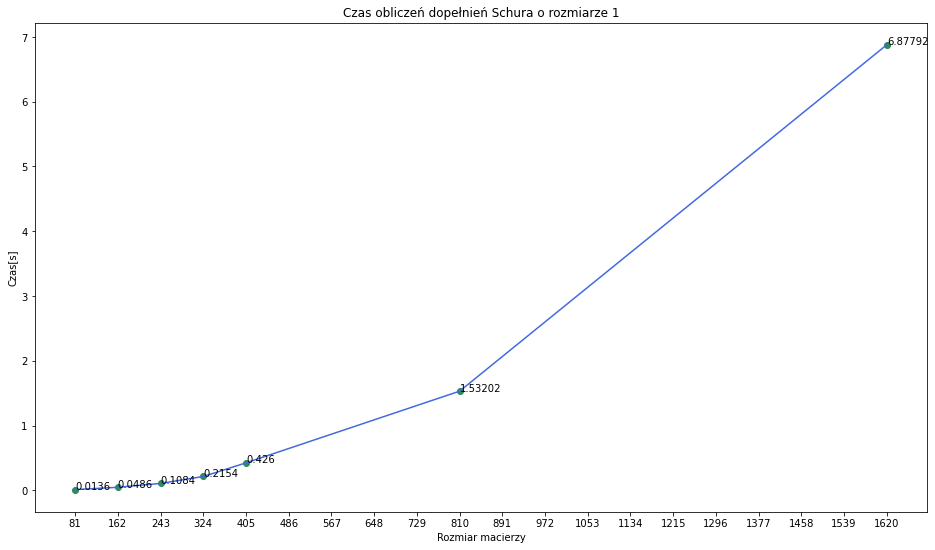

In [197]:
times = get_schur_compliment_times_for_fem(m_single_fun)
show_line_plot(qs, times, "Czas obliczeń dopełnień Schura o rozmiarze 1", "Rozmiar macierzy", "Czas[s]")

## Ad. 2
Badamy algorytm na przykładzie macierzy FEM.

**Wybór macierzy**

Wybór i przetworzenie macierzy do testów było analogiczne do punktu 1.

In [198]:
csv_file = "csv/fem81_2.csv"

**Działanie dla parametru `m = n/2`**

<ipython-input-2-63335f6c832d>:7: RuntimeWarning: invalid value encountered in double_scalars
  A[j, k:n] -= A[k, k:n]*(A[j,k]/akk)


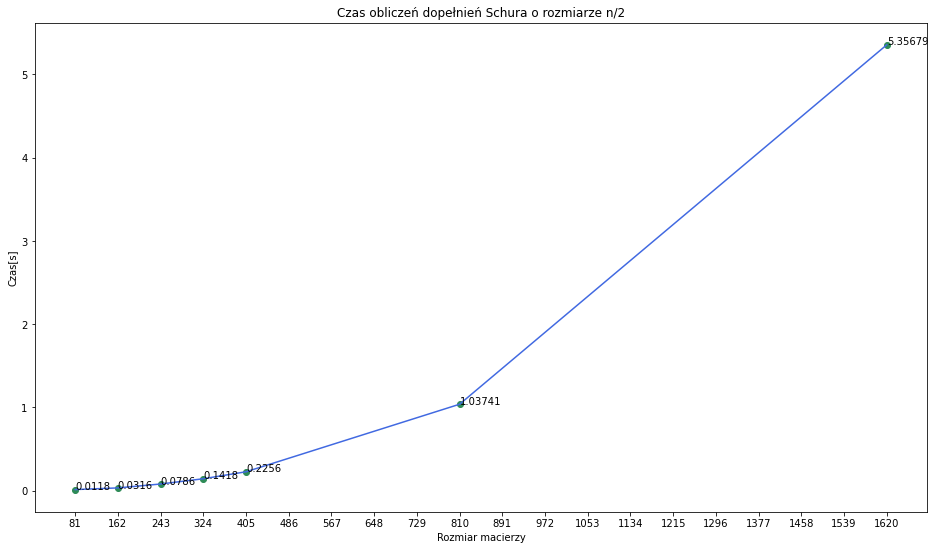

In [199]:
times = get_schur_compliment_times_for_fem(m_half_fun)
show_line_plot(qs, times, "Czas obliczeń dopełnień Schura o rozmiarze n/2", "Rozmiar macierzy", "Czas[s]")

**Działanie dla parametru `m = n/4`**

<ipython-input-2-63335f6c832d>:7: RuntimeWarning: invalid value encountered in double_scalars
  A[j, k:n] -= A[k, k:n]*(A[j,k]/akk)


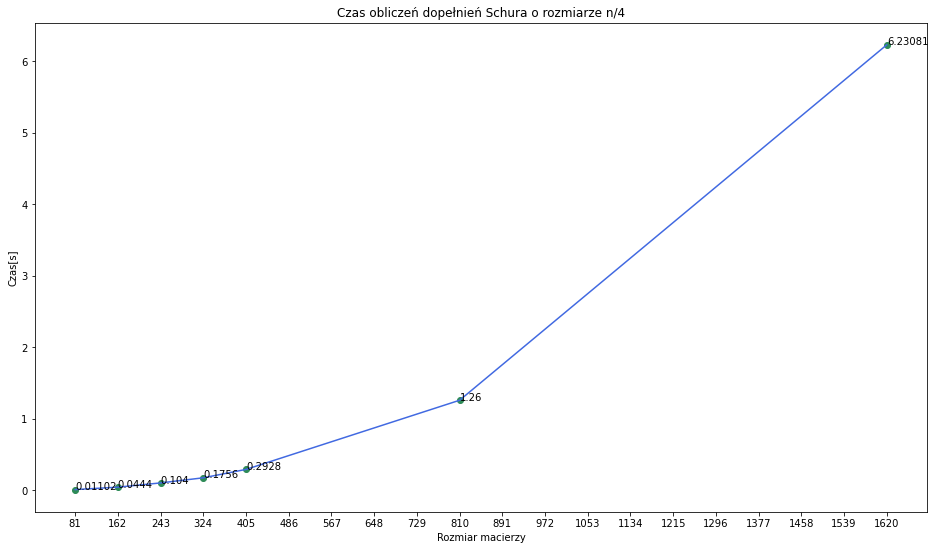

In [200]:
times = get_schur_compliment_times_for_fem(m_quater_fun)
show_line_plot(qs, times, "Czas obliczeń dopełnień Schura o rozmiarze n/4", "Rozmiar macierzy", "Czas[s]")

**Działanie dla parametru `m = n/8`**

<ipython-input-2-63335f6c832d>:7: RuntimeWarning: invalid value encountered in double_scalars
  A[j, k:n] -= A[k, k:n]*(A[j,k]/akk)


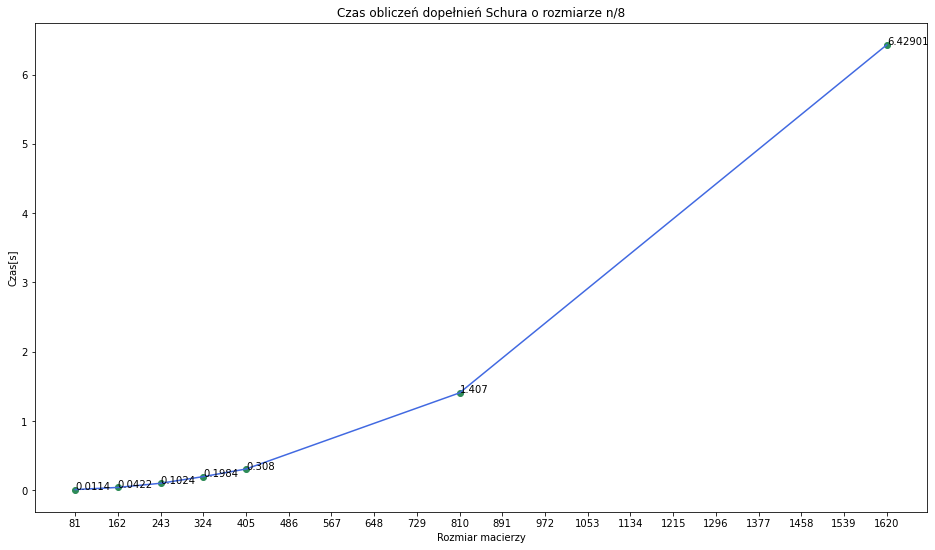

In [201]:
times = get_schur_compliment_times_for_fem(m_one_eight_fun)
show_line_plot(qs, times, "Czas obliczeń dopełnień Schura o rozmiarze n/8", "Rozmiar macierzy", "Czas[s]")

**Działanie dla parametru `m = n/16`**

<ipython-input-2-63335f6c832d>:7: RuntimeWarning: invalid value encountered in double_scalars
  A[j, k:n] -= A[k, k:n]*(A[j,k]/akk)


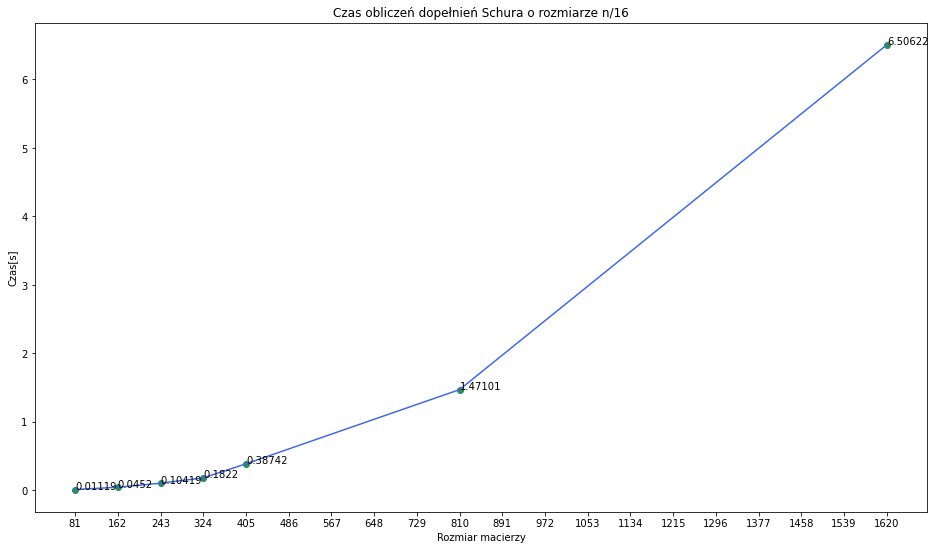

In [202]:
times = get_schur_compliment_times_for_fem(m_one_sixteen_fun)
show_line_plot(qs, times, "Czas obliczeń dopełnień Schura o rozmiarze n/16", "Rozmiar macierzy", "Czas[s]")

**Działanie dla parametru `m = n/32`**

<ipython-input-2-63335f6c832d>:7: RuntimeWarning: invalid value encountered in double_scalars
  A[j, k:n] -= A[k, k:n]*(A[j,k]/akk)


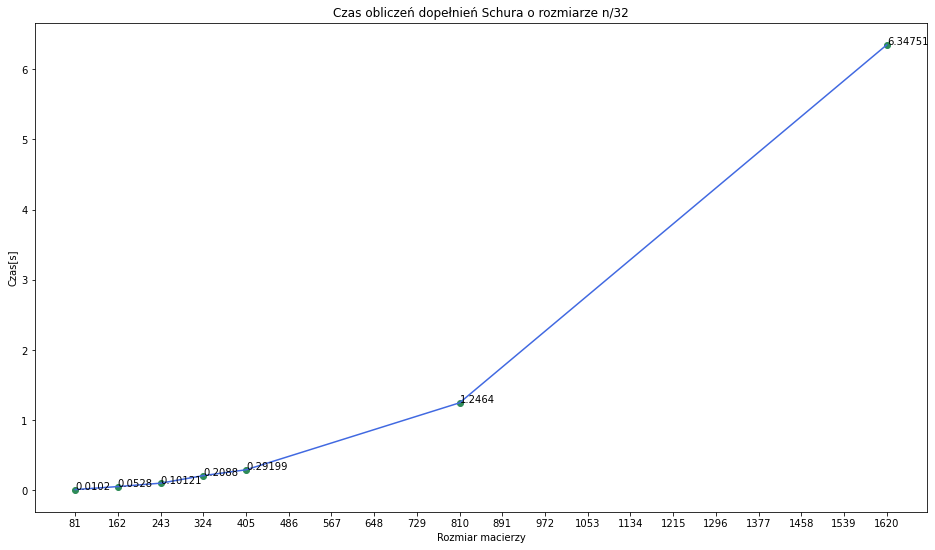

In [203]:
times = get_schur_compliment_times_for_fem(m_one_thirty_two_fun)
show_line_plot(qs, times, "Czas obliczeń dopełnień Schura o rozmiarze n/32", "Rozmiar macierzy", "Czas[s]")

**Działanie dla parametru `m = 1`**

<ipython-input-2-63335f6c832d>:7: RuntimeWarning: invalid value encountered in double_scalars
  A[j, k:n] -= A[k, k:n]*(A[j,k]/akk)


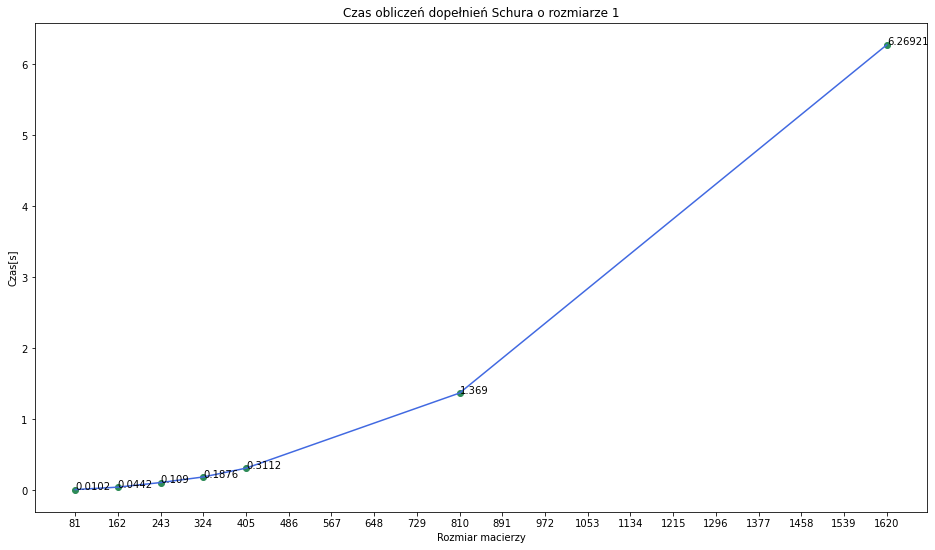

In [204]:
times = get_schur_compliment_times_for_fem(m_single_fun)
show_line_plot(qs, times, "Czas obliczeń dopełnień Schura o rozmiarze 1", "Rozmiar macierzy", "Czas[s]")

## Ad. 3
Obliczenie kosztu obliczeniowego oraz pamięciowego (*flops* i *memops*)

W funkcji `schur_compliment(A, m)` pierwsze 2 linie są potrzebne jedynie w celu przygotowania właściwych parametrów dla głównej procedury. W związku z tym nie dodajemy ich do obliczeń. <br>
Ponadto zakładamy, że liczba iteracji pierwszej pętli `for` jest równa `n - m`, ponieważ taką wartość przyjmuje zmienna `number_of_steps` w przypadku podania właściwego parametru `m`.



### Koszt obliczeniowy

Flopsy obliczyliśmy badając liczbę wykonanych operacji zmiennoprzecinkowych w kolejnych linijkach kodu.


![Flopsy obliczone](screeny/flop_opisany.png)

Zauważmy, że w ostatniej linii procedury możemy tylko raz obliczyć iloraz `A[j,k]/akk` dla całego wektora, dzięki czemu zaoszczędzamy sporo czasu na ciągłym wykonywaniu czasochłonnej operacji dzielenia.


### Koszt pamięciowy

Koszt pamięciowy został obliczony analogicznie jak liczba operacji zmiennoprzecinkowych. Wyniki przedstawiono poniżej:

![Memopsy obliczone](screeny/memop.png)

## Wnioski

Udało się nam poprawnie wykonać wszystkie zaplanowane punkty zadania.

Procedura wykonywała się w czasie mniejszym od 10 sekund dla macierzy wielkości 1620x1620 niezależnie od rozmiaru dopełnienia. Czas ten udało nam się uzyskać dzięki użyciu biblioteki numpy, która mocno przyśpiesza działania na wektorach (linia 7 w funkcji `schur_compliment`) oraz dzięki użyciu nawiadowania we wspomnianej linii (patrz: paragraf **Koszt obliczeniowy**)

Zgodnie z naszymi przewidywaniami, czas obliczeń rósł w tempie zbliżonym do sześciennego względem wielkości macierzy.
Także wpływ parametru `m` okazał się odpowiadać naszym oczekiwaniom. Wykonanie obliczeń dla `m= n/4` trwało zauważalnie mniej niż dla `m=1`.

Rodzaj macierzy (IGA/FEM) nie miał dużego wpływu na przebieg działania procedury. Dla macierzy FEM wykonywała się ona nieco szybciej, jednak może to być związane z czynnikami niezwiazanymi z właściwościami tej macierzy.

Na koniec należy powiedzieć o najwiekszym problemie klasycznego algorytmu Gaussa, czyli jego niestabilności. Z powodu ciągłego dzielenia przez liczby zbliżone do zera, istnieje ryzyko zinterpretowania małej liczby zmiennoprzecinkowej jako zero, z którego to powodu obliczenia są bezwartościowe. W powyższych przykładach niemal za kazdym razem otrzymujemy błąd `invalid value encountered in double_scalars` związany z dzieleniem przez małą liczbę. <br>
Zatem, znając niebezpieczeństwa tego algorytmu, powinien być on raczej unikany, ponieważ istnieją o wiele lepsze alternatywy (np. eliminacja Gaussa "po kolumnach" lub "po wierszach" czy dla macierzy symetrycznych i dodatnio określonych - faktoryzacja Choleskiego)